<a href="https://colab.research.google.com/github/7Fuzzy7/Intelig-ncia-Artificial-e-Computacional/blob/main/Exercicio_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Aula Prática: Algoritmos de Agrupamento em Python

Nesta aula, vamos explorar diferentes algoritmos de **clustering** (agrupamento não supervisionado) utilizando Python e bibliotecas como `scikit-learn`.

Murilo Pomin            rm:99683
Gabriel Taboada        rm:97957
Pedro Martins            rm:9866

---


In [13]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, SpectralClustering, AgglomerativeClustering
from sklearn.mixture import GaussianMixture

# Configurações de estilo
sns.set(style="whitegrid")


In [ ]:

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs, make_moons
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import dendrogram, linkage

# Reprodutibilidade
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Ajuste de tamanho padrão das figuras
plt.rcParams['figure.figsize'] = (7, 5)


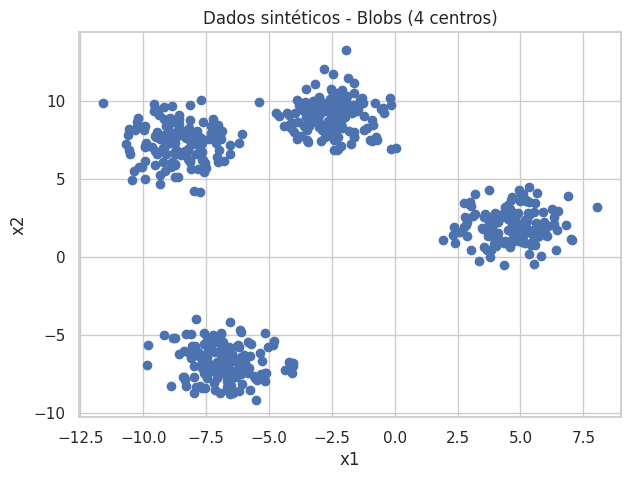

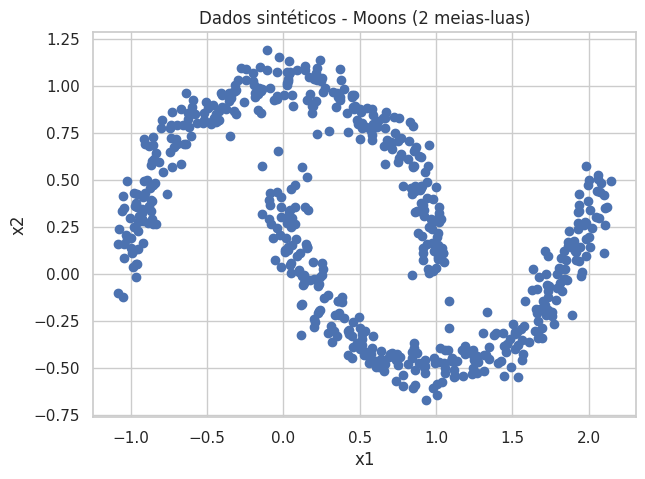

In [ ]:
X_blobs, y_blobs = make_blobs(n_samples=600, centers=4, cluster_std=1.10, random_state=RANDOM_STATE)
X_moons, y_moons = make_moons(n_samples=600, noise=0.07, random_state=RANDOM_STATE)

# Visualização dos dados gerados
fig = plt.figure()
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.title("Dados sintéticos - Blobs (4 centros)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

fig = plt.figure()
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title("Dados sintéticos - Moons (2 meias-luas)")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

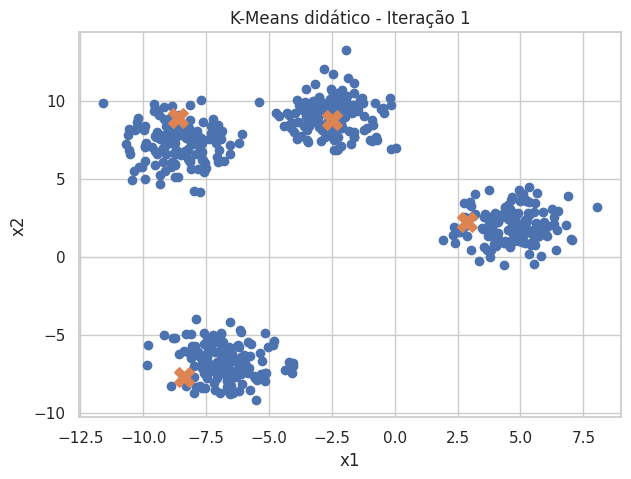

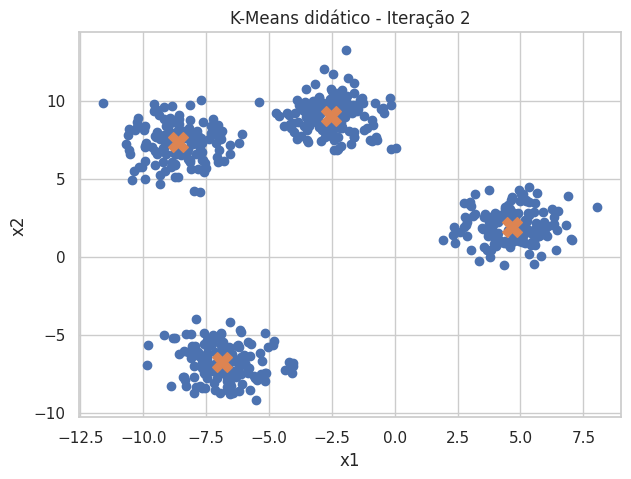

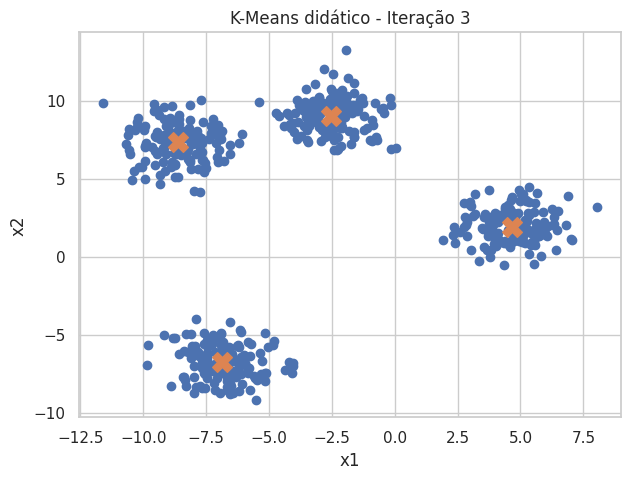

In [ ]:
def inicializar_centroides(X, k, rng=None):
    rng = np.random.default_rng(RANDOM_STATE if rng is None else rng)
    idx = rng.choice(len(X), size=k, replace=False)
    return X[idx].copy()

def atribuir_clusters(X, centroides):
    # Retorna o índice do centróide mais próximo para cada ponto
    dists = np.linalg.norm(X[:, None, :] - centroides[None, :, :], axis=2)
    return np.argmin(dists, axis=1)

def atualizar_centroides(X, labels, k):
    centroides = np.zeros((k, X.shape[1]), dtype=float)
    for j in range(k):
        pts = X[labels == j]
        if len(pts) > 0:
            centroides[j] = pts.mean(axis=0)
        else:
            # Se algum cluster fica vazio, re-inicializamos esse centróide
            centroides[j] = X[np.random.randint(0, len(X))]
    return centroides

def kmeans_didatico(X, k, max_iter=10):
    centroides_hist = []
    labels_hist = []
    centroides = inicializar_centroides(X, k)
    for it in range(max_iter):
        labels = atribuir_clusters(X, centroides)
        centroides_hist.append(centroides.copy())
        labels_hist.append(labels.copy())
        novos_centroides = atualizar_centroides(X, labels, k)
        if np.allclose(centroides, novos_centroides):
            centroides = novos_centroides
            centroides_hist.append(centroides.copy())
            labels_hist.append(labels.copy())
            break
        centroides = novos_centroides
    return centroides_hist, labels_hist

# Executando K-Means didático com k=4 em X_blobs e plotando iteração a iteração
k_demo = 4
cent_hist, lab_hist = kmeans_didatico(X_blobs, k_demo, max_iter=8)

for i, (C, L) in enumerate(zip(cent_hist, lab_hist), start=1):
    fig = plt.figure()
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
    plt.scatter(C[:, 0], C[:, 1], marker='X', s=200)
    plt.title(f"K-Means didático - Iteração {i}")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

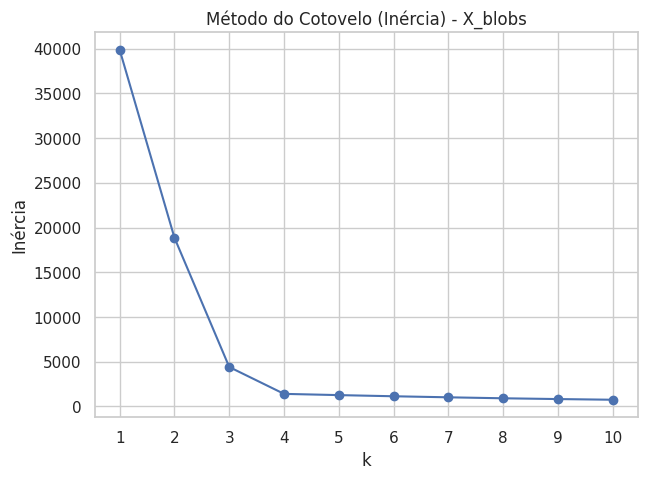

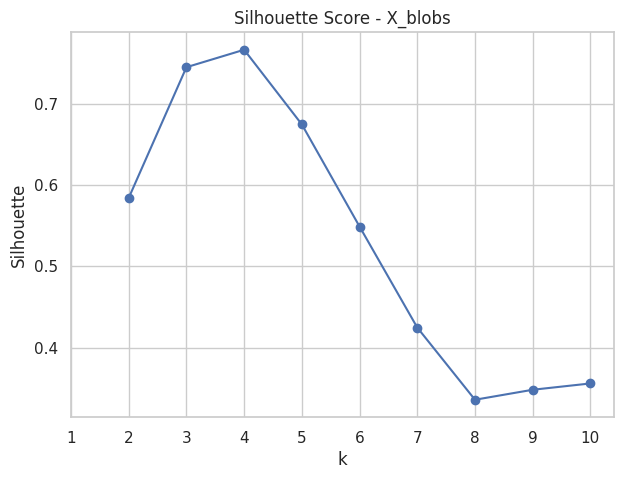

In [ ]:
def avalia_ks(X, ks, random_state=RANDOM_STATE):
    inercias = []
    sils = []
    for k in ks:
        km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        km.fit(X)
        inercias.append(km.inertia_)
        if k >= 2:
            sils.append(silhouette_score(X, km.labels_))
        else:
            sils.append(np.nan)
    return np.array(inercias), np.array(sils)

ks = list(range(1, 11))
inercias, sils = avalia_ks(X_blobs, ks)

# Gráfico do cotovelo
fig = plt.figure()
plt.plot(ks, inercias, marker='o')
plt.title("Método do Cotovelo (Inércia) - X_blobs")
plt.xlabel("k")
plt.ylabel("Inércia")
plt.xticks(ks)
plt.show()

# Gráfico do silhouette
fig = plt.figure()
plt.plot(ks, sils, marker='o')
plt.title("Silhouette Score - X_blobs")
plt.xlabel("k")
plt.ylabel("Silhouette")
plt.xticks(ks)
plt.show()

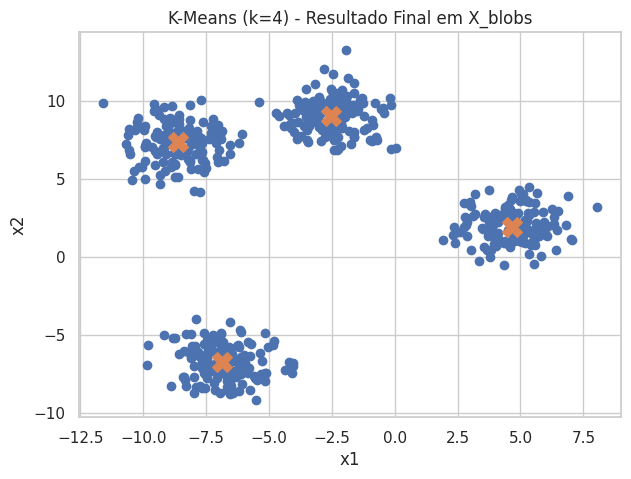

In [ ]:
k_escolhido = 4
km_final = KMeans(n_clusters=k_escolhido, n_init=10, random_state=RANDOM_STATE)
labels_final = km_final.fit_predict(X_blobs)
centroids_final = km_final.cluster_centers_

fig = plt.figure()
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.scatter(centroids_final[:, 0], centroids_final[:, 1], marker='X', s=200)
plt.title(f"K-Means (k={k_escolhido}) - Resultado Final em X_blobs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

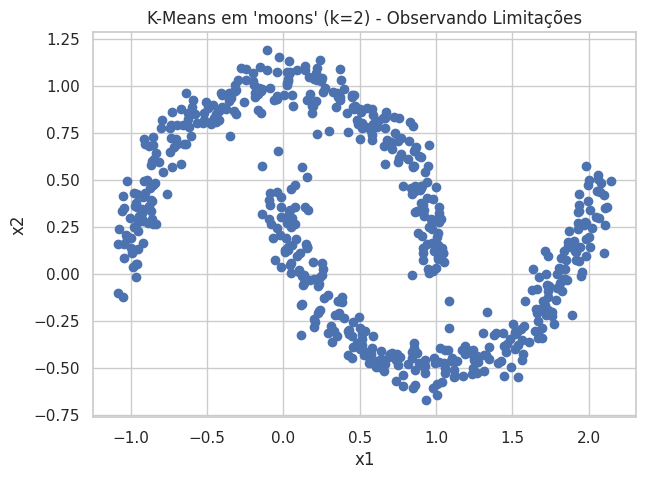

In [ ]:
km_moons = KMeans(n_clusters=2, n_init=10, random_state=RANDOM_STATE)
labels_moons = km_moons.fit_predict(X_moons)

fig = plt.figure()
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title("K-Means em 'moons' (k=2) - Observando Limitações")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

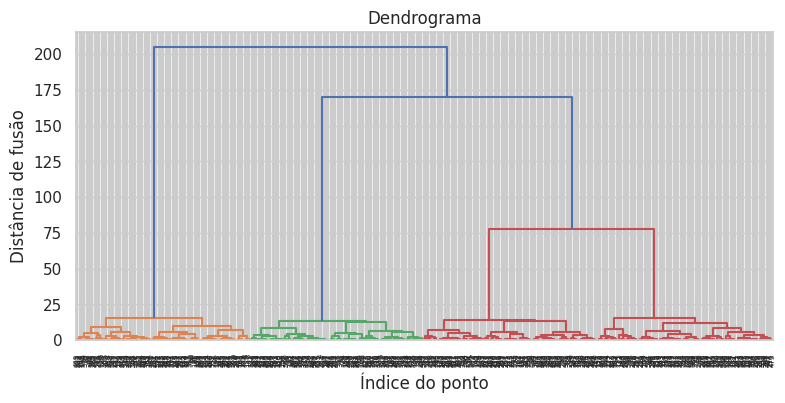

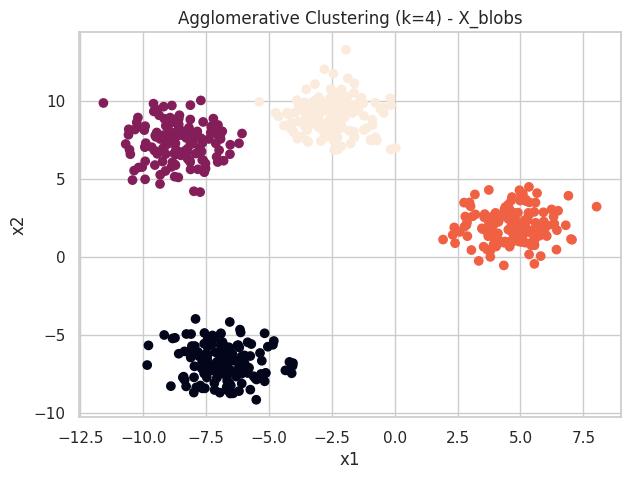

In [ ]:
# 6.1. Dendrograma (usando SciPy) em X_blobs
Z = linkage(X_blobs, method='ward')  # matriz de ligação hierárquica

fig = plt.figure(figsize=(9, 4))
dendrogram(Z)
plt.title("Dendrograma")
plt.xlabel("Índice do ponto")
plt.ylabel("Distância de fusão")
plt.show()

# 6.2. Cortando em k=4 (por exemplo) com AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=4, linkage='ward')
labels_agg = agg.fit_predict(X_blobs)

fig = plt.figure()
plt.scatter(X_blobs[:, 0], X_blobs[:, 1], c=labels_agg)
plt.title("Agglomerative Clustering (k=4) - X_blobs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


# **Exercícios**

# Exercício 1
Aplique o algoritmo de Clustering Aglomerativo e K-means no dataset Two Moons e faça um gráfico com o resultado

In [6]:
# install scikit-learn matplotlib pandas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

RANDOM_STATE = 42

def plot_side_by_side(X, labels_a, labels_b, title_a, title_b):
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    axes[0].scatter(X[:, 0], X[:, 1], c=labels_a, s=25, edgecolors="k")
    axes[0].set_title(title_a)
    axes[0].set_xlabel("x1"); axes[0].set_ylabel("x2"); axes[0].grid(True, ls=":")

    axes[1].scatter(X[:, 0], X[:, 1], c=labels_b, s=25, edgecolors="k")
    axes[1].set_title(title_b)
    axes[1].set_xlabel("x1"); axes[1].set_ylabel("x2"); axes[1].grid(True, ls=":")

    plt.tight_layout()
    plt.show()

def print_metrics(true_labels, pred_labels, X, method_name):
    sil = silhouette_score(X, pred_labels)
    ari = adjusted_rand_score(true_labels, pred_labels) if true_labels is not None else None
    print(f"[{method_name}] Silhouette: {sil:.3f}" + (f" | ARI vs. rótulo real: {ari:.3f}" if ari is not None else ""))

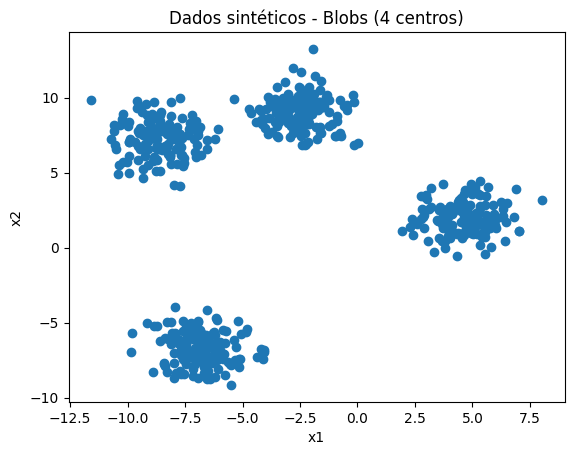

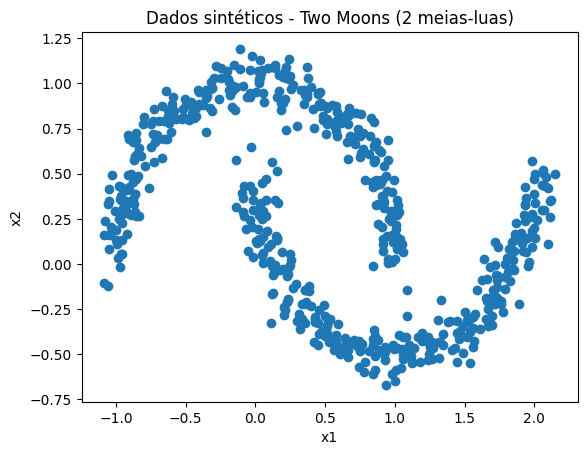

In [7]:
#GERAÇÃO DOS DADOS
X_blobs, y_blobs = make_blobs(n_samples=600, centers=4, cluster_std=1.10, random_state=RANDOM_STATE)
X_moons, y_moons = make_moons(n_samples=600, noise=0.07, random_state=RANDOM_STATE)

# Visualização
plt.figure()
plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
plt.title("Dados sintéticos - Blobs (4 centros)"); plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

plt.figure()
plt.scatter(X_moons[:, 0], X_moons[:, 1])
plt.title("Dados sintéticos - Two Moons (2 meias-luas)"); plt.xlabel("x1"); plt.ylabel("x2")
plt.show()

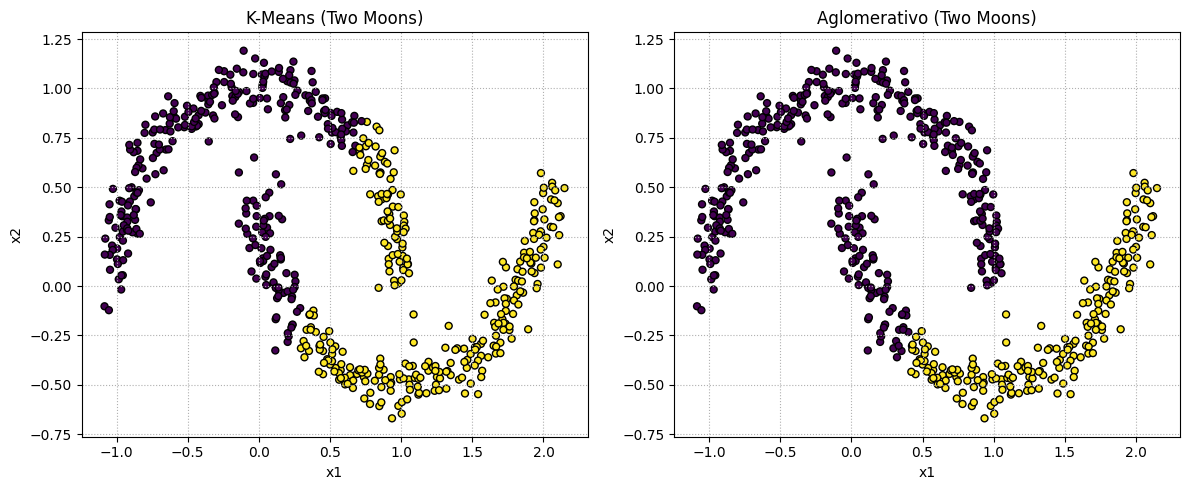

[K-Means] Silhouette: 0.489 | ARI vs. rótulo real: 0.242
[Aglomerativo] Silhouette: 0.441 | ARI vs. rótulo real: 0.499


In [8]:
# K-Means (k=2)
kmeans = KMeans(n_clusters=2, n_init=10, random_state=RANDOM_STATE)
y_kmeans = kmeans.fit_predict(X_moons)

# Aglomerativo (k=2)
agg = AgglomerativeClustering(n_clusters=2, linkage="ward")
y_agg = agg.fit_predict(X_moons)

# Plots lado a lado
plot_side_by_side(X_moons, y_kmeans, y_agg, "K-Means (Two Moons)", "Aglomerativo (Two Moons)")

# Métricas
print_metrics(y_moons, y_kmeans, X_moons, "K-Means")
print_metrics(y_moons, y_agg,    X_moons, "Aglomerativo")

In [9]:
# === FUNÇÕES DE AVALIAÇÃO PARA K-MEANS ===
def avalia_ks(X, ks, random_state=RANDOM_STATE):
    inercias = []
    sils = []
    for k in ks:
        km = KMeans(n_clusters=k, n_init=10, random_state=random_state)
        km.fit(X)
        inercias.append(km.inertia_)
        sils.append(silhouette_score(X, km.labels_) if k >= 2 else np.nan)
    return np.array(inercias), np.array(sils)

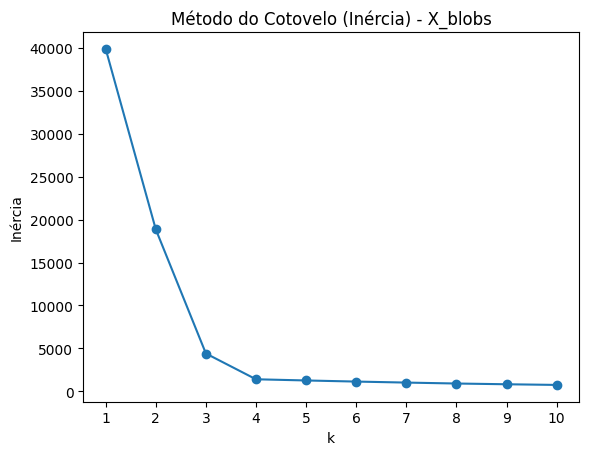

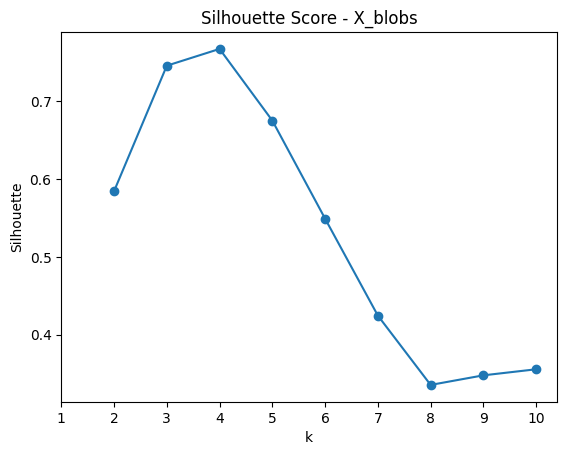

In [10]:
#Avaliação de k pelo cotovelo e silhouette em X_blobs
ks = list(range(1, 11))
inercias, sils = avalia_ks(X_blobs, ks)

plt.figure()
plt.plot(ks, inercias, marker='o')
plt.title("Método do Cotovelo (Inércia) - X_blobs")
plt.xlabel("k"); plt.ylabel("Inércia"); plt.xticks(ks); plt.show()

plt.figure()
plt.plot(ks, sils, marker='o')
plt.title("Silhouette Score - X_blobs")
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.xticks(ks); plt.show()

In [11]:
# Implementação didática do K-Means (passo a passo) em X_blobs
def inicializar_centroides(X, k, rng=None):
    rng = np.random.default_rng(RANDOM_STATE if rng is None else rng)
    idx = rng.choice(len(X), size=k, replace=False)
    return X[idx].copy()

def atribuir_clusters(X, centroides):
    dists = np.linalg.norm(X[:, None, :] - centroides[None, :, :], axis=2)
    return np.argmin(dists, axis=1)

def atualizar_centroides(X, labels, k):
    centroides = np.zeros((k, X.shape[1]), dtype=float)
    for j in range(k):
        pts = X[labels == j]
        centroides[j] = pts.mean(axis=0) if len(pts) > 0 else X[np.random.randint(0, len(X))]
    return centroides

def kmeans_didatico(X, k, max_iter=8):
    centroides_hist, labels_hist = [], []
    centroides = inicializar_centroides(X, k)
    for it in range(max_iter):
        labels = atribuir_clusters(X, centroides)
        centroides_hist.append(centroides.copy())
        labels_hist.append(labels.copy())
        novos_centroides = atualizar_centroides(X, labels, k)
        if np.allclose(centroides, novos_centroides):
            centroides = novos_centroides
            centroides_hist.append(centroides.copy())
            labels_hist.append(labels.copy())
            break
        centroides = novos_centroides
    return centroides_hist, labels_hist

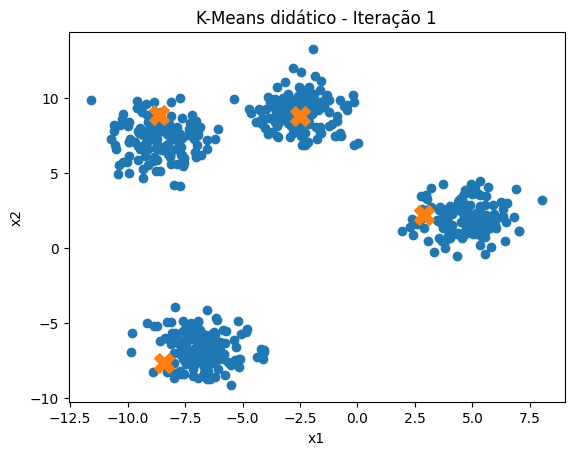

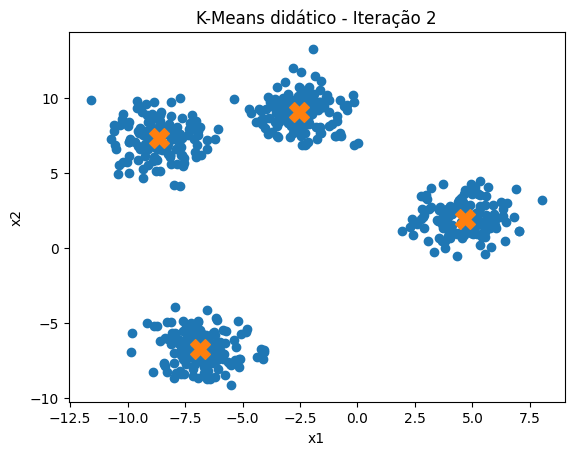

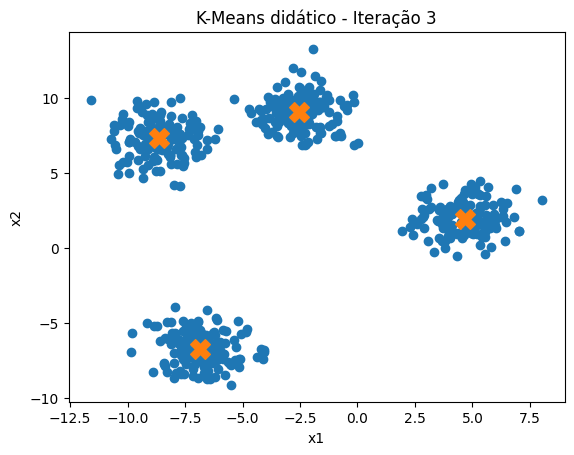

In [12]:
#Executar K-Means didático com k=4 e plotar iteração a iteração
k_demo = 4
cent_hist, lab_hist = kmeans_didatico(X_blobs, k_demo, max_iter=8)

for i, (C, L) in enumerate(zip(cent_hist, lab_hist), start=1):
    plt.figure()
    plt.scatter(X_blobs[:, 0], X_blobs[:, 1])
    plt.scatter(C[:, 0], C[:, 1], marker='X', s=200)
    plt.title(f"K-Means didático - Iteração {i}")
    plt.xlabel("x1"); plt.ylabel("x2")
    plt.show()

# Exercício 2
## Segmentação de Imagens com K-Means

A ideia é tratar cada **pixel** como um ponto em um espaço de cores (por exemplo, RGB ) e aplicar K-Means para agrupar pixels com cores semelhantes. Em seguida, substituímos cada pixel pela cor média (centróide) de seu cluster, criando uma **imagem segmentada** que destaca regiões homogêneas.

# **Exercício:**
1. Carregar imagem (usaremos uma de demonstração; se `scikit-image` não estiver disponível, geraremos uma imagem sintética).
2. Converter a imagem para um espaço de cor apropriado (RGB ou Lab) e remodelar para `(n_pixels, n_canais)`.
3. Executar `KMeans(n_clusters=k)`.
4. Reconstruir e exibir a imagem segmentada.
5. Isolar um cluster específico como máscara.
6. Executar os itens do 3 ao 5 para valores de K variando na faixa [10, 50, 200, 500, 1000]


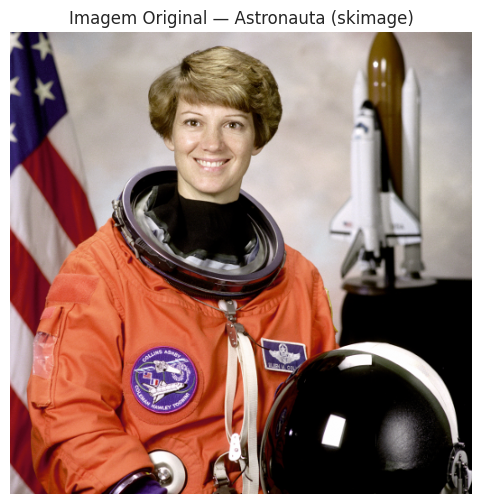

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Tentativa de carregar uma imagem de exemplo do scikit-image;
img = None
img_name = None

from skimage import data, img_as_float
from skimage.color import rgb2lab, lab2rgb
img = img_as_float(data.astronaut())  # (512, 512, 3) RGB
img_name = "Astronauta (skimage)"

plt.figure(figsize=(6,6))
plt.imshow(img)
plt.axis("off")
plt.title(f"Imagem Original — {img_name}")
plt.show()

In [2]:
# install scikit-image scikit-learn matplotlib

import numpy as np
import matplotlib.pyplot as plt

from skimage import data, img_as_float
from skimage.transform import resize
from skimage.color import rgb2lab, lab2rgb

from sklearn.cluster import MiniBatchKMeans  # mais rápido para imagens
# from sklearn.cluster import KMeans  # se quiser o KMeans "clássico" (mais lento)

RANDOM_STATE = 42

def show(img, title="", size=(6,6)):
    plt.figure(figsize=size)
    plt.imshow(np.clip(img, 0, 1))
    plt.axis("off")
    plt.title(title)
    plt.show()

def downscale(img, max_side=256):
    h, w = img.shape[:2]
    scale = max_side / max(h, w)
    if scale >= 1.0:
        return img
    return resize(img, (int(h*scale), int(w*scale)), anti_aliasing=True, preserve_range=True)

def segment_image_kmeans(img_rgb, k, use_minibatch=True, batch_size=2048, n_init=5, max_iter=100):
    """
    Segmenta uma imagem RGB (float [0,1]) usando K-Means em espaço Lab.
    Retorna: (seg_rgb, labels_2d, centers_lab, major_cluster_idx, mask_major)
    """
    # Espaço de cor perceptual
    X_lab = rgb2lab(img_rgb)                      # (H, W, 3)
    H, W, C = X_lab.shape
    X_flat = X_lab.reshape(-1, C)                 # (N, 3)

    if use_minibatch:
        km = MiniBatchKMeans(
            n_clusters=k, batch_size=batch_size, n_init=n_init,
            max_iter=max_iter, random_state=RANDOM_STATE
        )
    else:
        from sklearn.cluster import KMeans
        km = KMeans(n_clusters=k, n_init=n_init, random_state=RANDOM_STATE)

    labels = km.fit_predict(X_flat)               # (N,)
    centers = km.cluster_centers_                 # (k, 3)

    # Reconstrução (cada pixel vira seu centróide Lab)
    seg_lab = centers[labels].reshape(H, W, C)
    seg_rgb = lab2rgb(seg_lab)

    # Cluster mais frequente (só como exemplo de máscara)
    counts = np.bincount(labels, minlength=k)
    major_idx = int(np.argmax(counts))
    mask = (labels == major_idx).reshape(H, W)

    return seg_rgb, labels.reshape(H, W), centers, major_idx, mask


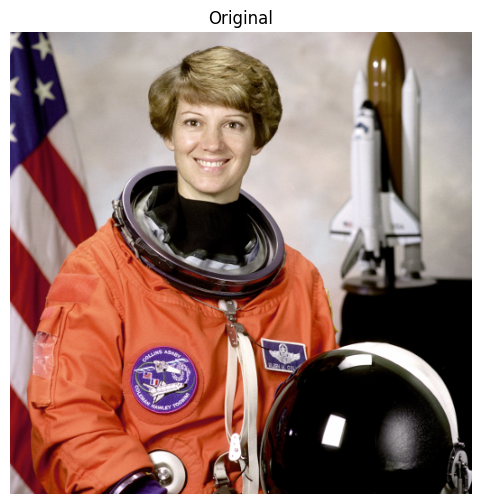

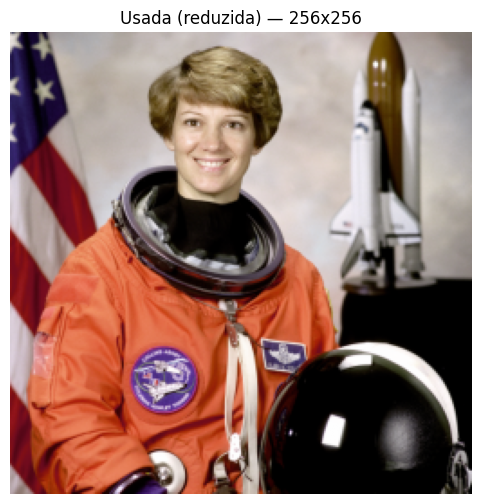

In [3]:
# imagem de demonstração
img = img_as_float(data.astronaut())  # (512, 512, 3)

# Reduz para acelerar K grandes (ajuste max_side para mais qualidade)
img_small = downscale(img, max_side=256)

show(img, "Original")
show(img_small, f"Usada (reduzida) — {img_small.shape[1]}x{img_small.shape[0]}")


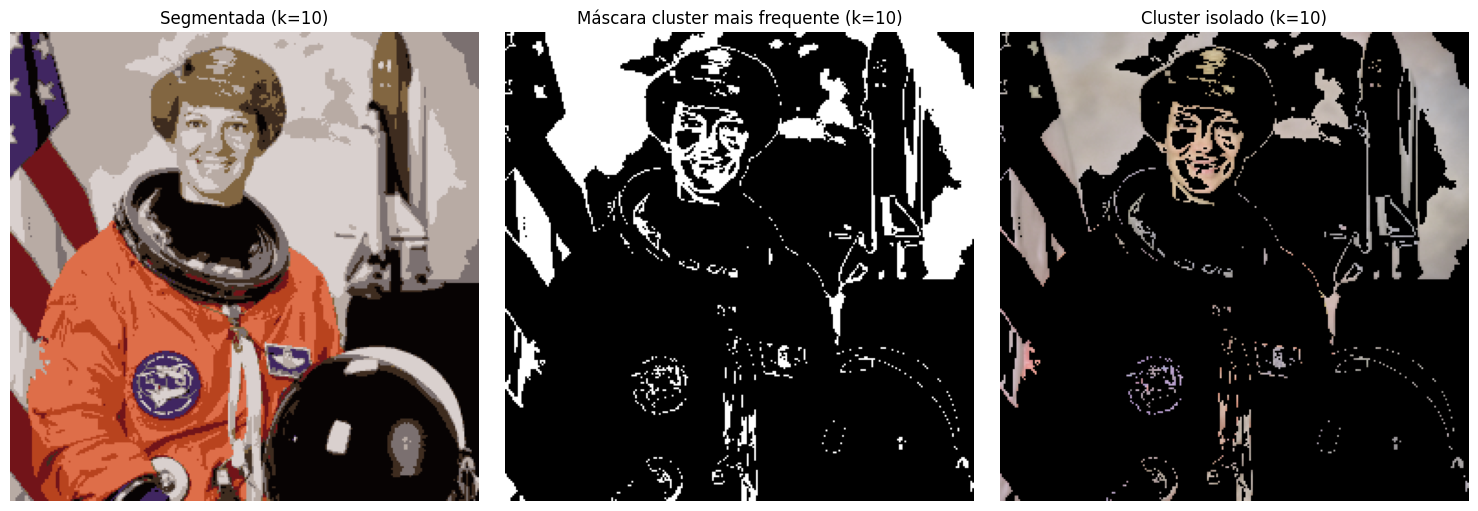

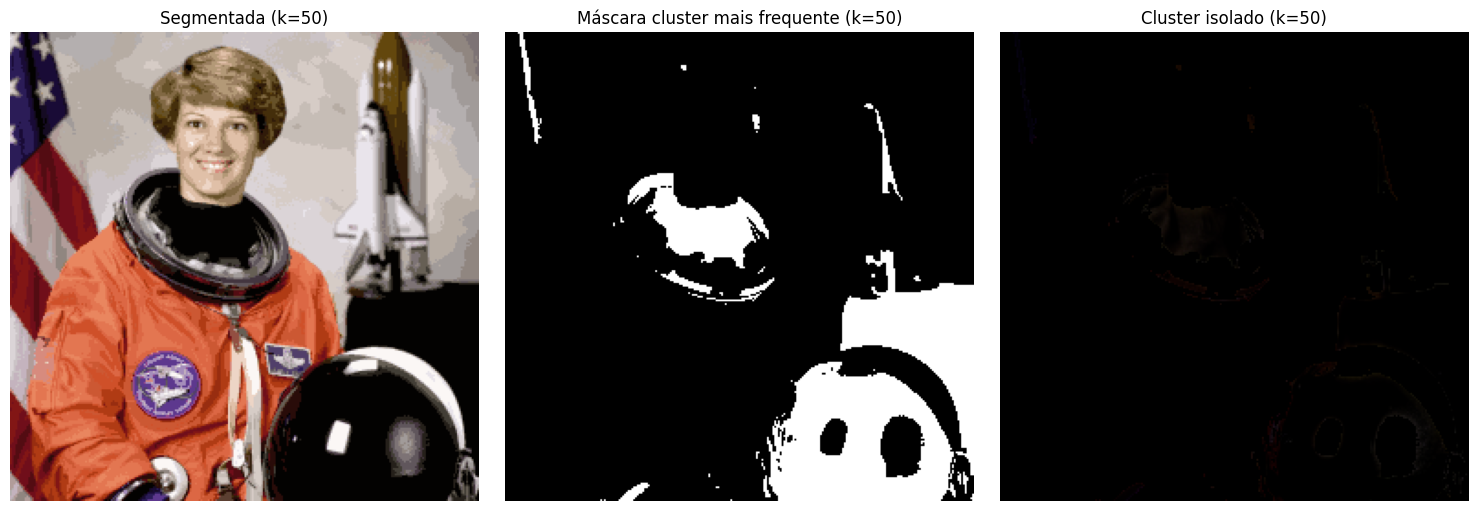

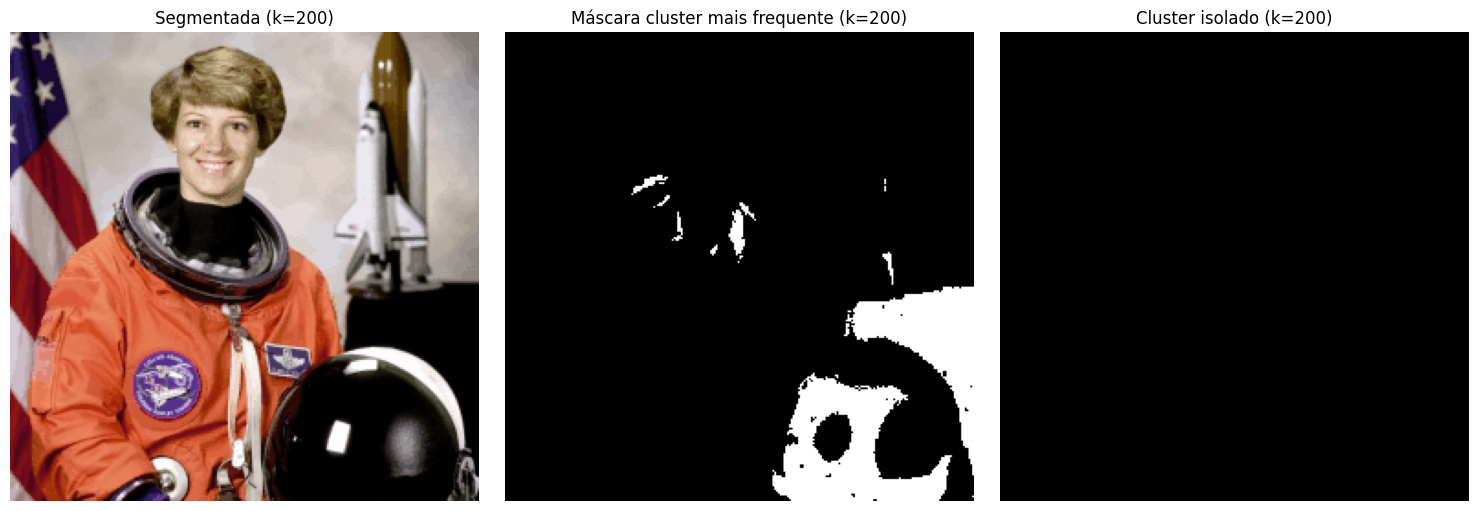

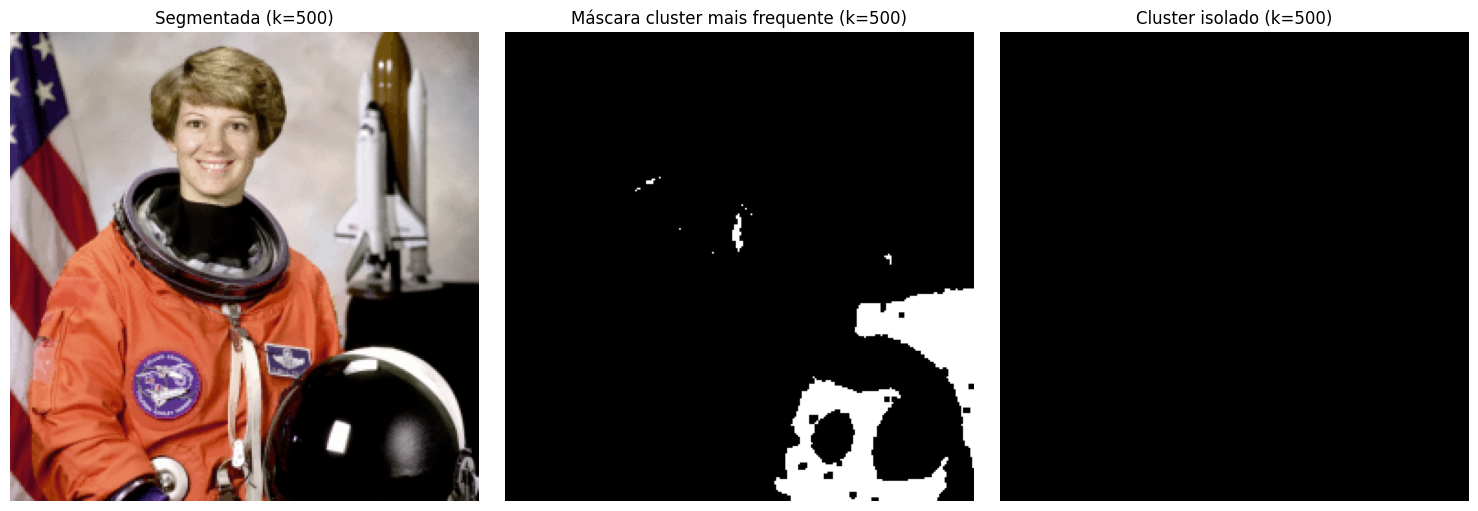

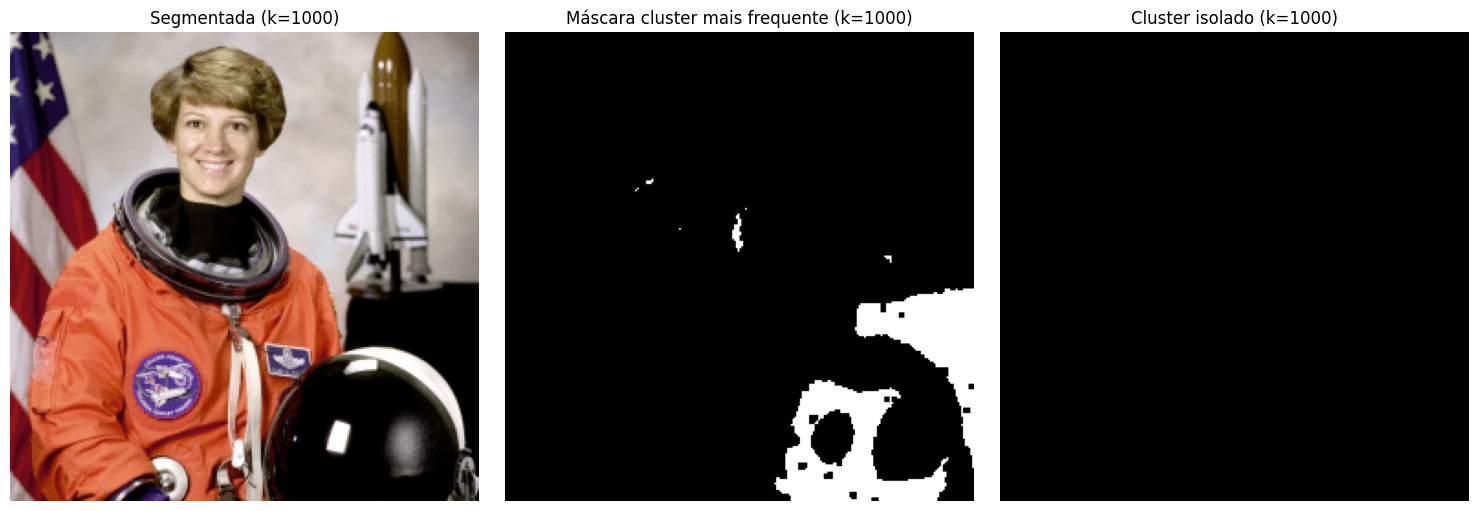

In [4]:
ks = [10, 50, 200, 500, 1000]

results = {}
for k in ks:
    seg_rgb, labels2d, centers_lab, major_idx, mask = segment_image_kmeans(
        img_small, k, use_minibatch=True, batch_size=2048, n_init=5, max_iter=100
    )
    results[k] = (seg_rgb, labels2d, centers_lab, major_idx, mask)

    # Visualização compacta por k
    masked_rgb = img_small.copy()
    masked_rgb[~mask] = 0.0

    plt.figure(figsize=(15,5))
    plt.subplot(1,3,1); plt.imshow(seg_rgb); plt.axis("off"); plt.title(f"Segmentada (k={k})")
    plt.subplot(1,3,2); plt.imshow(mask, cmap="gray"); plt.axis("off"); plt.title(f"Máscara cluster mais frequente (k={k})")
    plt.subplot(1,3,3); plt.imshow(masked_rgb); plt.axis("off"); plt.title(f"Cluster isolado (k={k})")
    plt.tight_layout(); plt.show()


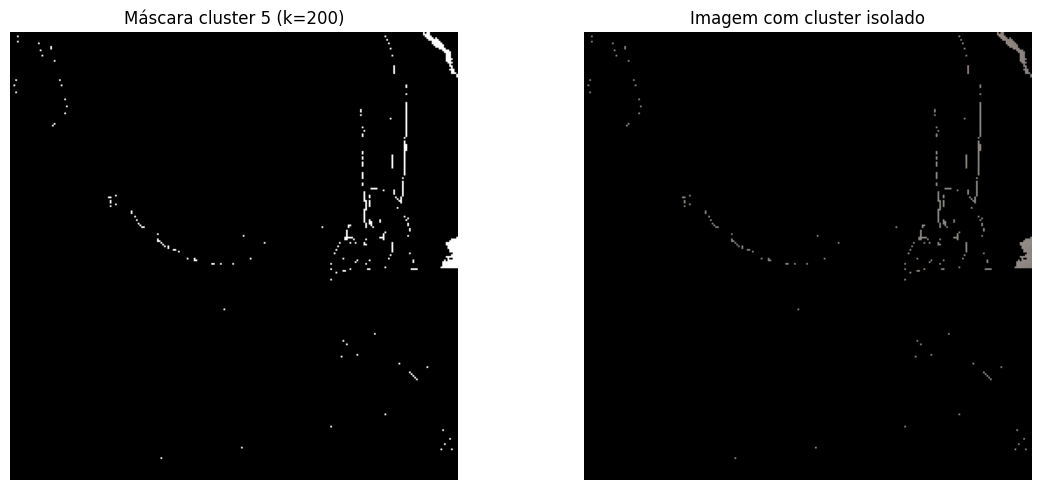

In [5]:
# K e o índice do cluster que quer isolar
k_escolhido = 200
cluster_id = 5   # mude aqui

seg_rgb, labels2d, centers_lab, major_idx, mask_major = results[k_escolhido]

mask_escolhida = (labels2d == cluster_id)
img_masked = img_small.copy()
img_masked[~mask_escolhida] = 0.0

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(mask_escolhida, cmap="gray"); plt.axis("off"); plt.title(f"Máscara cluster {cluster_id} (k={k_escolhido})")
plt.subplot(1,2,2); plt.imshow(img_masked); plt.axis("off"); plt.title("Imagem com cluster isolado")
plt.tight_layout(); plt.show()
